In [2]:
# for each cluster of camels basins, find the most sensitive parameters

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib
import glob, os, sys

# load data

In [3]:
dtmp = np.load('SA_data.npz', allow_pickle=True)
df_param = pd.DataFrame(dtmp['df_param'])
df_info = pd.DataFrame(dtmp['df_info'])
params = dtmp['params']
paramnames = dtmp['paramnames'][:-3]# the last three are binding parameters
# paramnames = df_param[3].values
kge = dtmp['kge']
df_info.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1013500,0.0,-68.56551,47.01169,2303988086.78,277.49349,NaN,NaN,647993,RawTDX,...,2246.946668,2246.628415,2246.132802,0.022767,-0.002554,-0.002695,-0.002915,0.002554,POLYGON ((-68.84000529335947 46.73746031546882...,/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/C...
1,1022500,0.0,-68.07313,44.79691,620387273.442,103.6042,NaN,NaN,312624,HSTDX,...,615.173865,586.427404,586.60245,0.081568,0.072479,0.022363,0.022668,0.022363,POLYGON ((-68.13005554673525 44.64716666195261...,/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/C...
2,1030500,0.0,-68.14985,45.80527,3676154745.1,174.433896,NaN,NaN,662248,RawCAMELS,...,3654.475429,3653.788946,3653.84583,-0.000004,-0.005901,-0.006088,-0.006073,0.000004,POLYGON ((-68.35800170861474 45.67902755716805...,/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/C...
3,1031500,0.0,-69.58119,45.23568,766544703.216,304.74349,NaN,NaN,309614,RawCAMELS,...,775.632787,772.001421,772.168545,-0.003258,0.00856,0.003838,0.004055,0.003258,POLYGON ((-69.67646789509475 45.14558029212971...,/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/C...
4,1047000,0.0,-70.16213,44.98744,904956194.351,379.779978,NaN,NaN,310157,RawCAMELS,...,914.491471,914.237495,913.814091,-0.004558,0.005931,0.005651,0.005185,0.004558,POLYGON ((-70.10847473135688 45.21669387774366...,/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/C...


In [4]:
# for plotting. does not affect results
df_param.at[0, 1]='Infiltration'
df_param.at[4, 1]='Infiltration'
df_param.at[20, 1]='Rain-Snow temperature'
df_param.at[21, 1]='ET'
df_param.at[24, 1]='ET'
df_param.at[25, 1]='Radiation'
df_param

,0,1,2,3,4,5,6,7,8,9
0,Hydrology,Infiltration,1,fff,0.5,0.02,5.0,Same,Param,None
1,Hydrology,Infiltration,23,e_ice,6.0,0.1,8.0,Low0to0.1,Param,None
2,Hydrology,Infiltration,7,d_max,15.0,10.0,60.0,Same,Param,None
3,Hydrology,Infiltration,0,FMAX,0.381669,0.1,0.9,NotInPPE,Surfdata,None
4,Hydrology,Infiltration,31,om_frac_sf,1.0,0.8,1.2,Same,Param,None
5,Hydrology,Canopy Interception,45,interception_fraction,1.0,0.1,1.0,Low0.5to0.1,Namelist,None
6,Hydrology,Soil storage capacity,9,watsat_sf,1.0,0.8,1.2,Same,Param,None
7,Hydrology,Soil storage capacity,11,sucsat_sf,1.0,0.1,10.0,Same,Param,None
8,Hydrology,Soil storage capacity,27,bsw_sf,1.0,0.8,1.2,Same,Param,None
9,Hydrology,Soil storage capacity,0,zbedrock,10.639669,8.512,12.768,Same,Surfdata,None


In [5]:
dtmp = np.load('SA_pyviscous_output.npz', allow_pickle=True)
sens_indx_first = dtmp['sens_indx_first']
sens_indx_total = dtmp['sens_indx_total']

In [6]:
# # remove Basins without sensitivity analysis
# indnosen = sens_indx_first[0,:]<0
# print('Basins without sensitivity analysis:', len(indnosen))

# kge = kge[:, ~indnosen]
# sens_indx_first = sens_indx_first[:,~indnosen]
# sens_indx_total = sens_indx_total[:,~indnosen]
# df_info = df_info.loc[~indnosen]

In [7]:
# Basins with total sensitivity < 0
indneg = []
for i in range(sens_indx_total.shape[1]):
    indi = sens_indx_total[:,i]<0
    num = np.sum(indi)
    if num>0:
        # print(i, '--', num)
        indneg.append( [i, num] )

    # negative values to zero
    sens_indx_total[indi, i] = 0

# indneg = np.array(indneg)
# dtmp = sens_indx_total[:, indneg[:,0]]
# plt.plot(dtmp)
# plt.show()

In [8]:
# # load basin cluster results: method-1
# infile = '../camels_cluster/CAMELS_level1_627_clusters.csv'
# df_cluster = pd.read_csv(infile)
# df_cluster

# if np.any( (df_info[0] - df_cluster['hru_id']).values !=0 ):
#     print('Mistmatch between basins and clusters')
# else:
#     print('basins and clusters match')

In [9]:
infile = '../camels_cluster/Manuela_Brunner_2020/flood_cluster_memberships_CAMELS.txt'
df_cluster = pd.read_csv(infile)
df_cluster = df_cluster.rename(columns={'Camels_IDs':'hru_id', 'flood_cluster':'clusters'})
df_cluster2 = pd.DataFrame()

for id in df_info[0].values:
    dfi = df_cluster.loc[df_cluster['hru_id']==id]
    df_cluster2 = pd.concat([df_cluster2, dfi])

df_cluster2.index = np.arange(len(df_cluster2))
df_cluster = df_cluster2
del df_cluster2
df_cluster['clusters'] = df_cluster['clusters'] - 1 # starting from 0

if np.any( (df_info[0] - df_cluster['hru_id']).values !=0 ):
    print('Mistmatch between basins and clusters')
else:
    print('basins and clusters match')

basins and clusters match


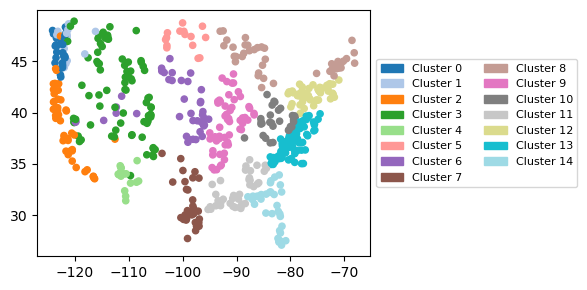

In [10]:
# plot clusters
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches


lat = df_info[3].values
lon = df_info[2].values

fig, ax = plt.subplots(figsize=[6, 3])

# Create a scatter plot
scatter = ax.scatter(lon, lat, c=df_cluster['clusters'], cmap='tab20', s=20)

# Create a legend
legend_labels = {int(cluster): mpatches.Patch(color=color, label=f'Cluster {int(cluster)}')
                 for cluster, color in zip(df_cluster['clusters'], scatter.cmap(scatter.norm(scatter.get_array())))}
handles = [legend_labels[cluster] for cluster in range(15)]
plt.legend(handles=handles, bbox_to_anchor=(1.02, 0.8), loc=2, borderaxespad=0, ncol=2, fontsize=8)

plt.tight_layout()
plt.show()
# plt.savefig('basin_clusters.png', dpi=600, bbox_inches='tight', pad_inches=0)

# For each cluster of basins, select the most sensitive parameters
Criteria: sum of first order senstivity of selected parameters should be larger than 80% of the sum of all parameters

In [11]:
# number of parameters decided by average sensitivity
sensamount = 0.85

sens_indx_use = sens_indx_first.copy()
sens_indx_use[sens_indx_use<0]=np.nan
sens_indx_use_m = np.nanmedian(sens_indx_use, axis=1)
indsort = np.argsort(-sens_indx_use_m)
    
sens_indx_use_m_sort = sens_indx_use_m[indsort]

# Calculate the total sensitivity
total_sensitivity = np.sum(sens_indx_use_m_sort)
    
# Calculate the cumulative sum of sensitivities
cumulative_sensitivity = np.cumsum(sens_indx_use_m_sort)
    
# Calculate the threshold for 80% of total sensitivity
threshold_sensitivity = sensamount * total_sensitivity
    
# Find the number of parameters required to reach or exceed the 80% threshold
num_parameters = np.argmax(cumulative_sensitivity >= threshold_sensitivity) + 1  # Adding 1 as arrays are 0-indexed

print(num_parameters)

14


0.8816188463180356 0.8893874422488206 14
0.9201585952609849 0.9390097387315184 15
0.8804627767842188 0.8880476488064527 14
0.829010500764837 0.8308899810002642 14
0.8318839452755288 0.8425983781408953 10
0.7872486321351154 0.7878969378001097 13
0.8058350899359092 0.8191896033656263 15
0.7558907923232288 0.765484572602406 13
0.7161673654142912 0.721191883210965 17
0.7734061609775122 0.7858508788425476 15
0.789520511949952 0.7965757718309976 17
0.710244062056544 0.7250692022581737 15
0.7279388257394356 0.733510968152171 15
0.7678576773928288 0.7788838040116031 14
0.6768785200619878 0.6786774365903081 14


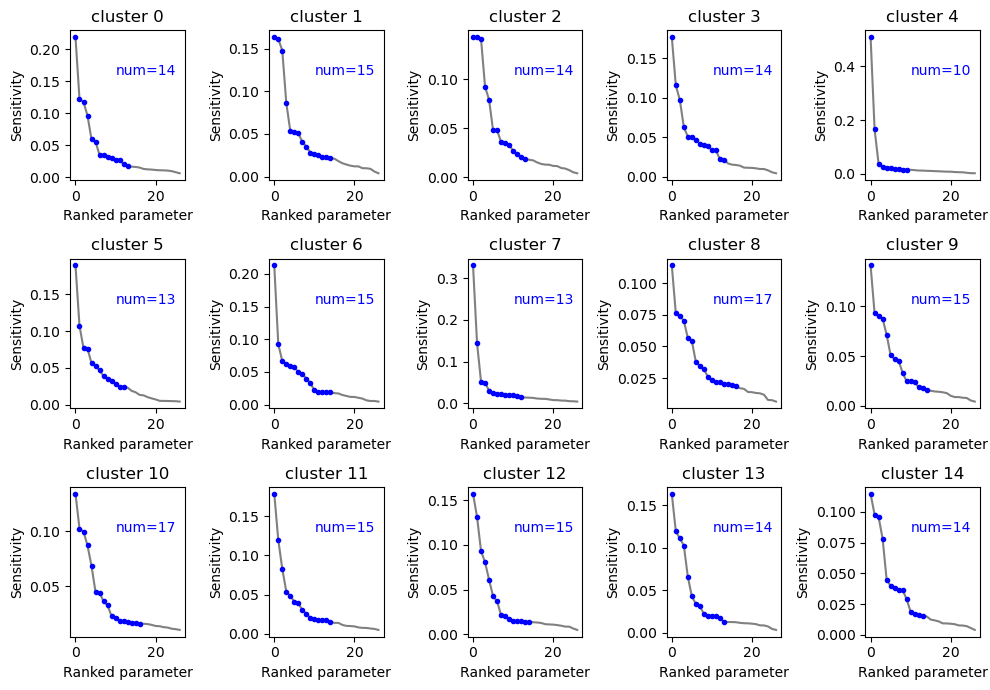

In [12]:
# sort the sensitivity from the highest to the lowest for each cluster

sensamount = 0.85

sens_indx_use = sens_indx_first.copy()
# sens_indx_use = sens_indx_total.copy()
sens_indx_use[sens_indx_use<0]=np.nan

use_params = []

fig = plt.figure(figsize=[10, 7])

for i in range(15):
    indexc = df_cluster['clusters'].values==i
    sens_indx_use_c = sens_indx_use[:, indexc]
    sens_indx_use_cm = np.nanmean(sens_indx_use_c, axis=1)
    indsort = np.argsort(-sens_indx_use_cm)
    
    sens_indx_use_cm_sort = sens_indx_use_cm[indsort]
    order = np.arange(len(paramnames))
    order_sort = order[indsort]
    
    ax = fig.add_subplot(3, 5, i+1)
    
    plt.plot(order, sens_indx_use_cm_sort, color='grey')
    # plt.xticks(order, order_sort, rotation=90, fontsize=5)
    plt.title(f'cluster {i}')
    plt.xlabel('Ranked parameter')
    plt.ylabel('Sensitivity')


    # Calculate the total sensitivity
    total_sensitivity = np.sum(sens_indx_use_cm_sort)
    
    # Calculate the cumulative sum of sensitivities
    cumulative_sensitivity = np.cumsum(sens_indx_use_cm_sort)
    
    # Calculate the threshold for 80% of total sensitivity
    threshold_sensitivity = sensamount * total_sensitivity
    
    # Find the number of parameters required to reach or exceed the 80% threshold
    num_parameters = np.argmax(cumulative_sensitivity >= threshold_sensitivity) + 1  # Adding 1 as arrays are 0-indexed

    # use_params.append(paramnames[indsort][:num_parameters])
    use_params.append(order_sort[:num_parameters])

    # plot those parameters in the figure
    plt.plot(order[:num_parameters], sens_indx_use_cm_sort[:num_parameters], 'ob', markersize=3)
    plt.text(0.4, 0.7, f'num={num_parameters}', color='b', transform=ax.transAxes)
    
    print(threshold_sensitivity, np.sum(sens_indx_use_cm_sort[:num_parameters]), num_parameters)

plt.tight_layout()
# plt.show()
# plt.savefig('ranked_sensitivity_allclusters.png', dpi=600, bbox_inches='tight', pad_inches=0)

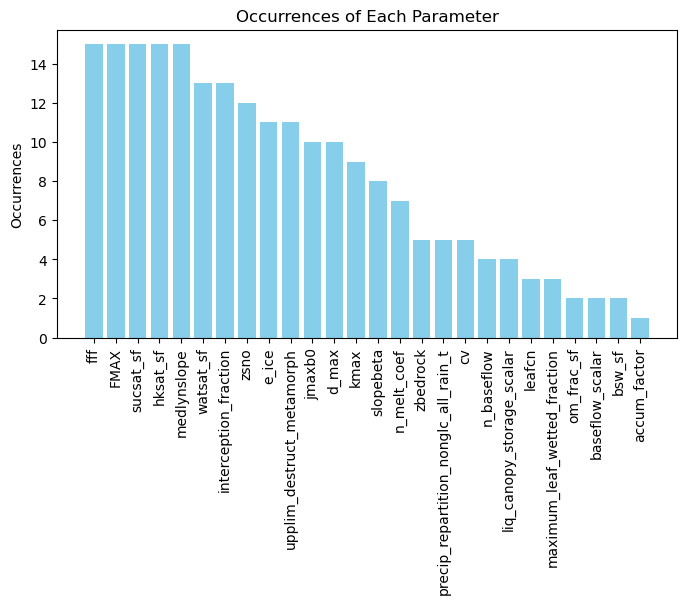

In [13]:
# the occurrence of all parameters selected for calibration
from collections import Counter

# Flatten the list of arrays into a single list
all_params = np.concatenate(use_params)

# Count the occurrences of each integer
occurrences = Counter(all_params)

# Convert the occurrences dictionary to a sorted list by parameter number for plotting
params_sorted = np.array(sorted(occurrences.items()))

# Save the sorted occurrences to an array
# The first column contains the parameter numbers, and the second column contains the occurrences
sorted_params_array = np.array(params_sorted)
indsort = np.argsort(-sorted_params_array[:,1])
sorted_params_array = sorted_params_array[indsort, :]

paramnames_calib = paramnames[sorted_params_array[:,0]]
occurrence_calib = sorted_params_array[:,1]

# Example plotting code
plt.figure(figsize=(8, 4))
# plt.bar(sorted_params_array[:, 0], sorted_params_array[:, 1], color='skyblue')
plt.bar(paramnames_calib,occurrence_calib, color='skyblue')
# plt.xlabel('Parameter Number')
plt.ylabel('Occurrences')
plt.title('Occurrences of Each Parameter')
plt.xticks(rotation=90)
plt.show()
# plt.savefig('parameter_occurrence_allbasins.png', dpi=600, bbox_inches='tight', pad_inches=0)

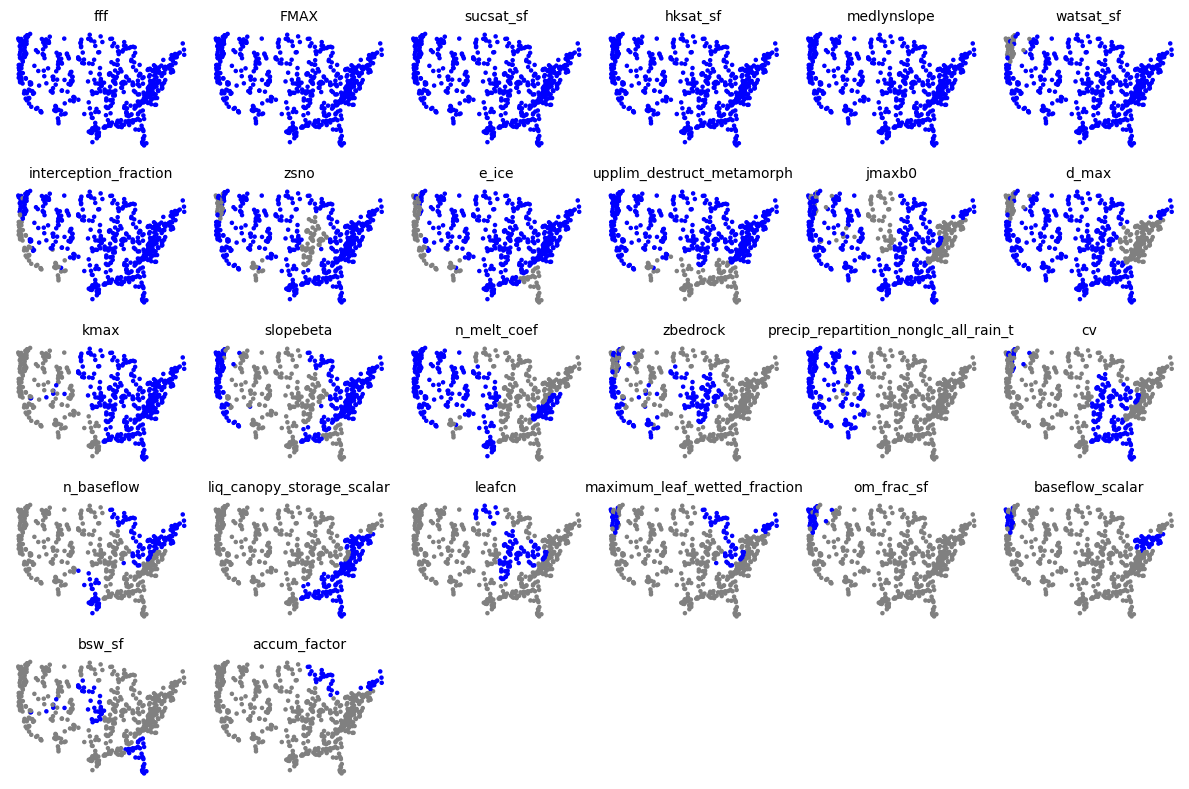

In [14]:
fig = plt.figure(figsize=[12, 8])

for j in range(len(paramnames_calib)):
    # p = 'n_melt_coef'
    p = paramnames_calib[j]
    indp = np.where(paramnames==p)[0][0]
    
    
    usep = np.zeros(len(df_cluster))
    for i in range(len(use_params)):
        if indp in use_params[i]:
            indi = df_cluster['clusters'].values==i
            usep[indi] = 1

    fig.add_subplot(5, 6, j+1)
    cmap = ListedColormap(['grey', 'blue'])
    plt.scatter(lon, lat, s=5, c=usep, vmin=0, vmax=1, cmap=cmap)
    plt.title(p, fontsize=10)
    plt.axis('off')
    # plt.colorbar()

plt.tight_layout()
plt.show()
# plt.savefig('parameter_occurrence_eachcluster.png', dpi=600, bbox_inches='tight', pad_inches=0)

All processes: ['Biogeochemistry' 'Hydrology' 'Sensible and Latent Heat Fluxes'
 'Snow Processes' 'Stomatal resistance and photosynthesis'] 5


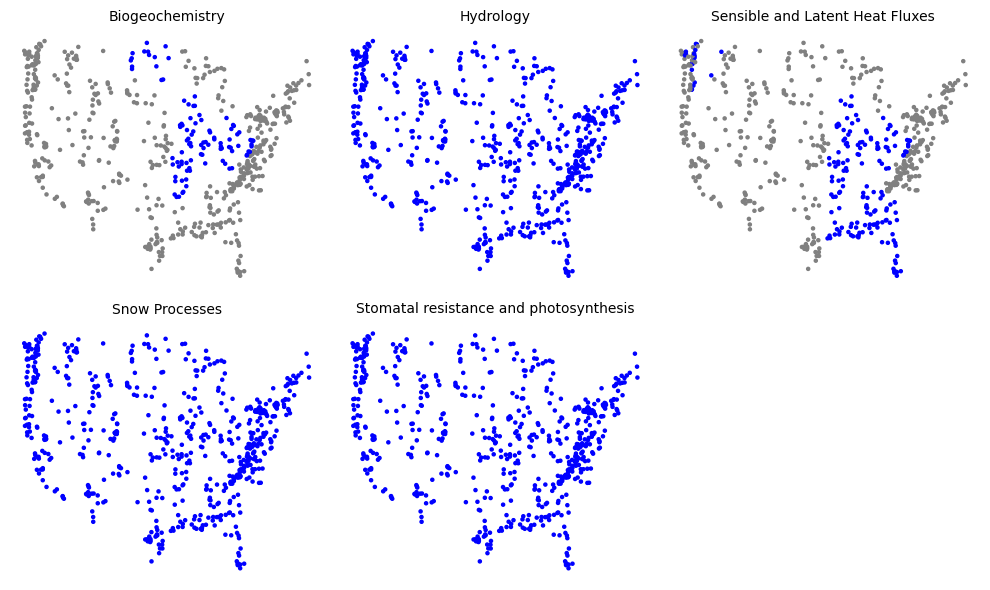

In [15]:
# what processes are covered in each cluster
processes = df_param[0].values[:-3]
process_name = np.unique(processes)
print('All processes:', process_name, len(process_name))
process_cover = np.zeros([len(df_cluster), len(process_name)])

for p in range(len(process_name)):
    indexp = np.where(processes==process_name[p])[0]

    usep = np.zeros(len(df_cluster))
    for i in range(len(use_params)):
        indi = df_cluster['clusters'].values==i
        for j in use_params[i]:
            if j in indexp:
                usep[indi]=1
                break
    
    process_cover[:,p] = usep


fig = plt.figure(figsize=[10, 6])
for i in range(len(process_name)):
    fig.add_subplot(2, 3, i+1)
    cmap = ListedColormap(['grey', 'blue'])
    plt.scatter(lon, lat, s=5, c=process_cover[:,i], vmin=0, vmax=1, cmap=cmap)
    plt.title(process_name[i], fontsize=10)
    plt.axis('off')
    # plt.colorbar()

plt.tight_layout()
plt.show()
# plt.savefig('process_occurrence_allclusters.png', dpi=600, bbox_inches='tight', pad_inches=0)

All processes: ['Baseflow generation' 'Canopy Interception' 'Canopy Water' 'ET'
 'Infiltration' 'Photosynthesis' 'Plant growth' 'Plant hydraulics'
 'Radiation' 'Rain-Snow temperature' 'Snow accumulation' 'Snow melt'
 'Snowpack physics' 'Soil storage capacity ' 'Soil water drainage '
 'Surface Water Storage'] 16


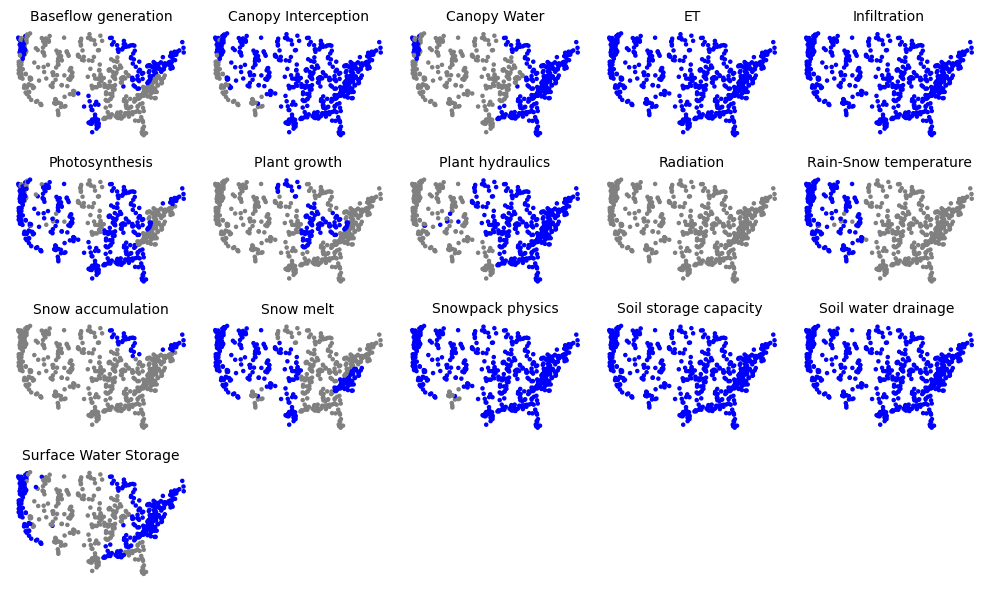

In [16]:
# what processes are covered in each cluster (detailed)
processes = df_param[1].values[:-3]
process_name = np.unique(processes)
print('All processes:', process_name, len(process_name))
process_cover = np.zeros([len(df_cluster), len(process_name)])

for p in range(len(process_name)):
    indexp = np.where(processes==process_name[p])[0]

    usep = np.zeros(len(df_cluster))
    for i in range(len(use_params)):
        indi = df_cluster['clusters'].values==i
        for j in use_params[i]:
            if j in indexp:
                usep[indi]=1
                break
    
    process_cover[:,p] = usep


fig = plt.figure(figsize=[10, 6])
for i in range(len(process_name)):
    fig.add_subplot(4, 5, i+1)
    cmap = ListedColormap(['grey', 'blue'])
    plt.scatter(lon, lat, s=5, c=process_cover[:,i], vmin=0, vmax=1, cmap=cmap)
    plt.title(process_name[i], fontsize=10)
    plt.axis('off')
    # plt.colorbar()

plt.tight_layout()
# plt.show()
# plt.savefig('process_detailed_occurrence_allclusters.png', dpi=600, bbox_inches='tight', pad_inches=0)

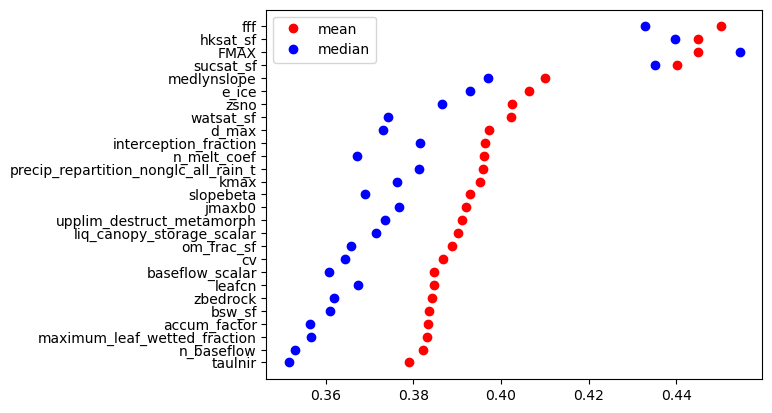

In [17]:
dtmp = sens_indx_total.copy()
dtmp[dtmp<0]=np.nan
sens_indx_first_mean = np.nanmean(dtmp, axis=1)
ind = np.argsort(sens_indx_first_mean)
plt.plot(sens_indx_first_mean[ind], paramnames[ind], 'or', label='mean')

sens_indx_first_mean = np.nanmedian(dtmp, axis=1)
plt.plot(sens_indx_first_mean[ind], paramnames[ind], 'ob', label='median')
plt.legend()
plt.show()

# Save calibration parameters for each basin
Each basin will have a csv file for calibration

In [19]:
infile_SA_param = '../parameter/CTSM_CAMELS_SA_param_240202_smallrange.csv'
df_SA_param = pd.read_csv(infile_SA_param)

if np.any(df_SA_param['Parameter'].values != df_param[3].values[:-3]):
    print('Warning')
else:
    print('Match')

Match


In [21]:
outpath = '/glade/work/guoqiang/CTSM_CAMELS/data_paramcailb/'
os.makedirs(outpath, exist_ok=True)

for i in range(len(df_cluster)):
    idi = df_cluster.iloc[i]['hru_id']
    ci = df_cluster.iloc[i]['clusters']

    outfilei = f'{outpath}/ParamCalib_smallrange_{idi}.csv'

    if os.path.isfile(outfilei):
        print('exist')
        continue

    use_parami = use_params[ci]
    dfi = df_SA_param.loc[use_parami]

    dfi.to_csv(outfilei, index=False)

# Analyze one cluster

In [19]:
# test-1: Texas
tc = 7
tarparam = 'zsno'

# # test-2: California
# tc = 2
# tarparam = 'precip_repartition_nonglc_all_rain_t'

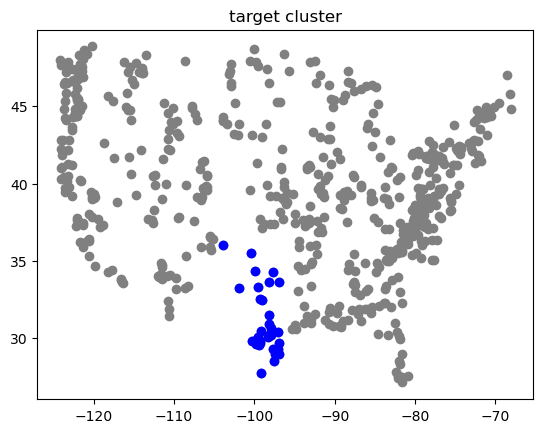

selected params for this cluster: ['fff' 'FMAX' 'zsno' 'medlynslope' 'hksat_sf' 'watsat_sf' 'd_max' 'e_ice'
 'jmaxb0' 'n_baseflow' 'n_melt_coef' 'interception_fraction' 'sucsat_sf']


In [20]:
indcluster = df_cluster['clusters'].values==tc
plt.scatter(lon, lat, color='grey')
plt.scatter(lon[indcluster], lat[indcluster], color='blue')
plt.title('target cluster')
plt.show()

print('selected params for this cluster:', paramnames[use_params[tc]])

zsno 0.0512753890873677


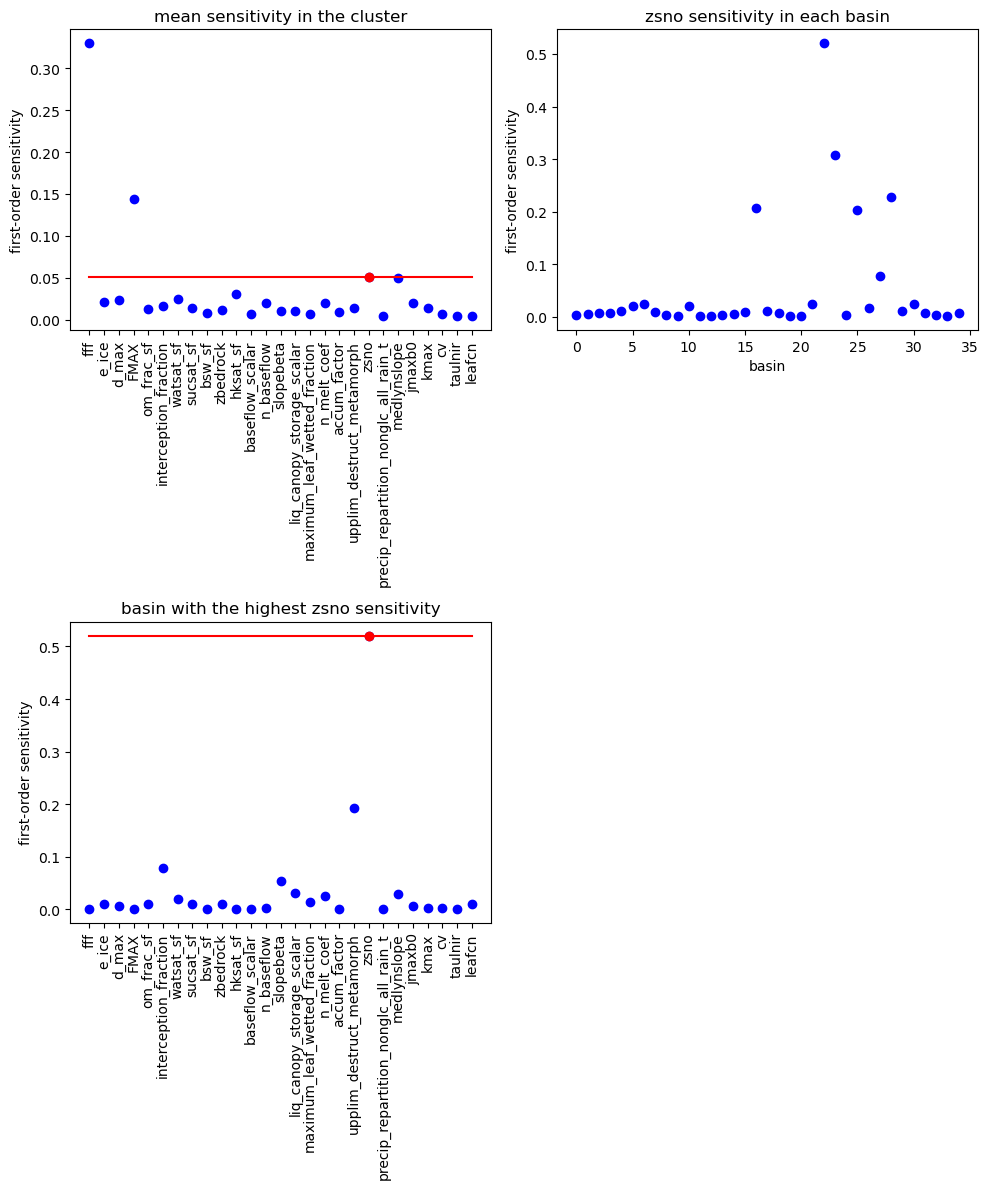

In [21]:
# plot mean sensitivity within this cluster
dtmp = sens_indx_first[:, indcluster].copy()
dtmp[dtmp<0]=np.nan
ms = np.nanmean(dtmp,axis=1)

ind = np.where(paramnames==tarparam)[0][0]
print(tarparam, ms[ind])

fig = plt.figure(figsize=[10, 12])

fig.add_subplot(2,2,1)
plt.plot(paramnames, ms, 'ob')
plt.plot(tarparam, ms[ind], 'or')
plt.plot(paramnames, ms[ind] * np.ones(len(paramnames)), 'r')
plt.xticks(rotation=90)
plt.ylabel('first-order sensitivity')
plt.title('mean sensitivity in the cluster')

fig.add_subplot(2,2,2)
plt.plot(dtmp[ind, :], 'ob')
plt.title(f'{tarparam} sensitivity in each basin')
plt.xlabel('basin')
plt.ylabel('first-order sensitivity')


fig.add_subplot(2, 2, 3)
# ind2 = np.argmax(dtmp[ind, :])
ind2 = np.argsort(-dtmp[ind, :])[0]
plt.plot(paramnames, dtmp[:,ind2], 'ob')
plt.plot(tarparam, dtmp[:,ind2][ind], 'or')
plt.plot(paramnames, dtmp[:,ind2][ind] * np.ones(len(paramnames)), 'r')
plt.xticks(rotation=90)
plt.ylabel('first-order sensitivity')
plt.title(f'basin with the highest {tarparam} sensitivity')

plt.tight_layout()
plt.show()

In [22]:
print(f'basin with the highest {tarparam} sensitivity:', ind2)
print('Basin info')
df_tmp = df_info[indcluster].iloc[[ind2]]
display(df_tmp)

basin with the highest zsno sensitivity: 22
Basin info


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
430,8171300,0.0,-98.31502,30.04894,1073941980.54,399.810585,NaN,NaN,320360,MHTDX,...,1073.227839,1065.991166,1068.154787,0.006063,0.005394,-0.001385,0.000642,0.000642,POLYGON ((-98.51361110111226 30.00483332333423...,/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/C...


In [23]:
# load simulation results for this basin

years = np.arange(2004, 2010)
files = []
path = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/SA_HH_allbasins/level1/ctsm_outputs'
for y in years:
    filesy = glob.glob(f'{path}/iter0_trial73/lnd/hist/level1_iter0_trial73.clm2.h0.{y}-*')
    filesy.sort()
    files = files + filesy

ds_simu = xr.open_mfdataset(files)

checkbasin = df_tmp.index.values[0]
ds_simu = ds_simu.isel(lndgrid=checkbasin)


In [24]:
# load observed streamflow
path = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/SA_HH_allbasins/level1/ctsm_outputs_evaluation'
file = f'{path}/obs_streamflow.nc'
ds_q_obs = xr.load_dataset(file)
ds_q_obs = ds_q_obs.isel(lndgrid=checkbasin).sel(time=slice(str(years[0]), str(years[-1])))

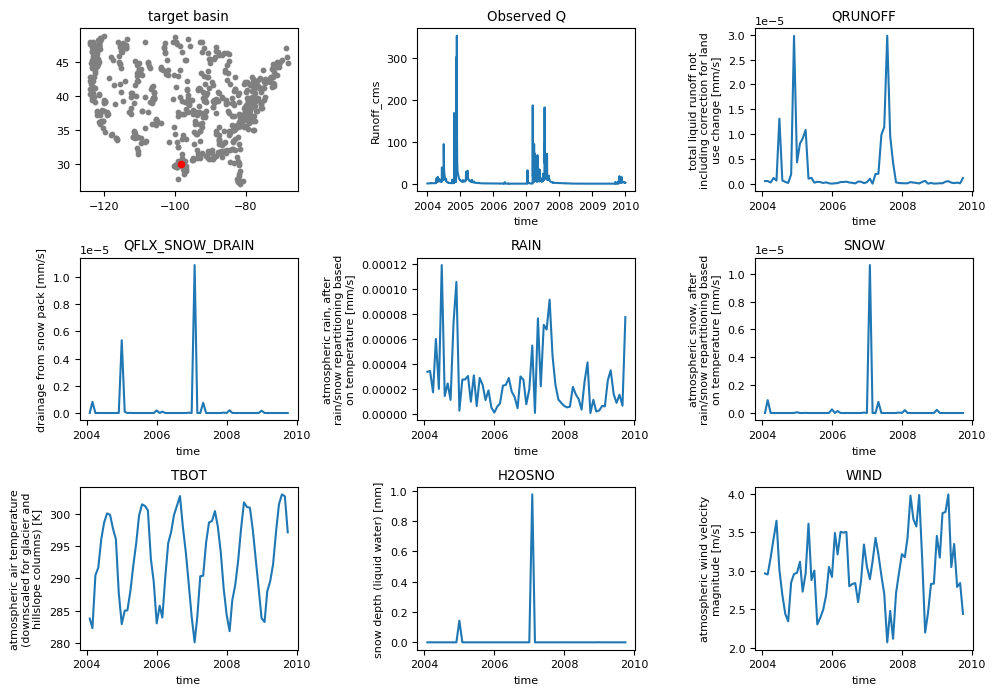

In [25]:
plotvars = ['QRUNOFF', 'QFLX_SNOW_DRAIN', 'RAIN', 'SNOW', 'TBOT', 'H2OSNO', 'WIND']

font = {'size'   : 8}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=[10, 7])


fig.add_subplot(3, 3, 1)
plt.scatter(lon, lat, s=10, color='grey')
plt.scatter(df_tmp[2].values, df_tmp[3].values, s=20, color='red')
plt.title('target basin')

fig.add_subplot(3, 3, 2)
ds_q_obs['Runoff_cms'].plot()
plt.title('Observed Q')

for i in range(len(plotvars)):
    vari = plotvars[i]

    fig.add_subplot(3, 3, i+3)
    ds_simu[vari].plot()
    plt.title(vari)

plt.tight_layout()
plt.show()
